In [293]:
from src import TARS, markets, portfolios, traders, strategies
import pandas as pd
from ta.trend import MACD

# Workbench

This is your place to try things and build new strategies. Be foolish!

## Instanciate Tars

In [294]:
root = '../'
api_key = f'{root}kraken.key'

In [295]:
# Create Tars and its associated objects
tars = TARS()
portfolio = portfolios.CryptoPortfolio(api_key)
trader = traders.CryptoTrader(portfolio, api_key)

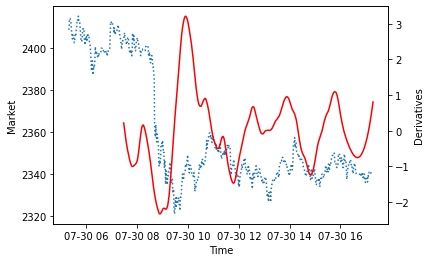

In [296]:
from scipy.signal import savgol_filter

n = 10
r = 60
w = 103
o = 4

market = markets.CryptoMarket()
df0 = market.get_ohlc_data(pair='XETHZUSD')[0]['close'].iloc[::-1]
df1 = df0.diff(n).diff(n).rolling(r).mean() #120
arr = savgol_filter(df1.to_numpy(), w, o) #103, 2
df2 = pd.DataFrame(arr).set_index(df1.index)
    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df0, color='tab:blue', linestyle='dotted')

#ax2.plot(df1, linestyle='dotted', color='red')
ax2.plot(df2, color='red')

ax1.set_xlabel('Time')
ax1.set_ylabel('Market')
ax2.set_ylabel('Derivatives')

plt.show()

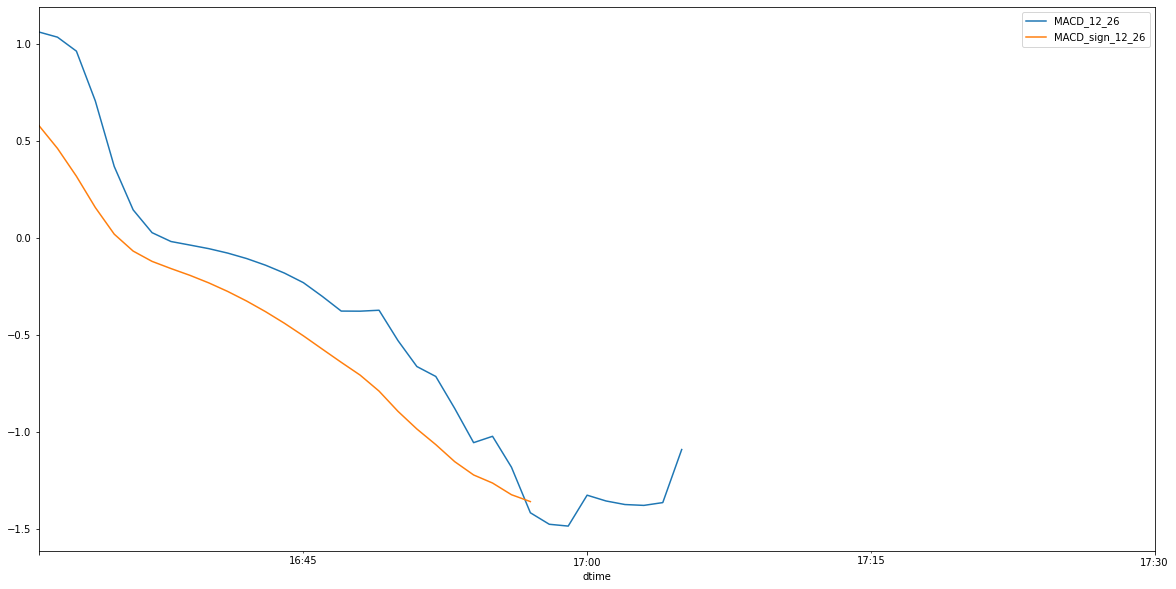

In [307]:
market = markets.CryptoMarket()
df0 = market.get_ohlc_data(pair='XETHZUSD')[0]['close']

macd = MACD(df0)
line = macd.macd()
signal = macd.macd_signal()

line[:60].plot(figsize=(20,10))
signal[:60].plot()
plt.legend();

In [287]:
signal = signal[-1]
line = line[-1]

In [ ]:
if signal < line :
    "buy"
elif line >= signal :
    "sell"
else:
    pass

In [14]:
# Load strategies
strategy_1 = strategies.BuyAndHold(trader_1, 'XETHZUSD', 0.2)
strategy_2 = strategies.SequentialInvestment(trader_2, 'XETHZUSD', 0.2, 6, "00:00:10")
#strategy_3 = strategies.RandomInvestment(trader_3, 'XETHZUSD', 0.2)

tars.load(strategy_1)
tars.load(strategy_2)
#tars.load(strategy_3)

## Start the bot

In [15]:
# Start the bot with a loop frequency ten second
tars.start('00:00:10')
tars.is_running

True

## Evaluate the strategy

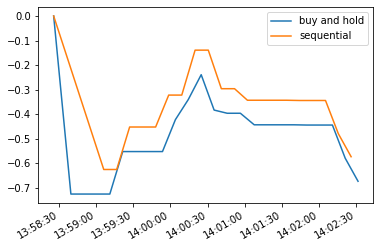

In [20]:
#col = 'value'
#col = 'total net profit'
#col = 'profit factor'
col = 'average trade net profit'


s1 = strategy_1.evaluator.evaluate()[col]
s1.name = 'buy and hold'

s2 = strategy_2.evaluator.evaluate()[col]
s2.name = 'sequential'

#s3 = strategy_3.evaluator.evaluate()[col]
#s3.name = 'random'

s1.plot(legend=True)
s2.plot(legend=True);
#s3.plot(legend=True);

## Stop the bot

In [21]:
tars.stop()
tars.is_running

False

---